# Cancelación del servicio (Churn)


<br>

---

El problema de la cancelación del servicio (Churn) es una de las principales preocupaciones en el sector de telecomunicaciones, ya que identificar qué clientes tienen mayor probabilidad de abandonar el servicio permite a las empresas de telefonía tomar medidas preventivas y mitigar este riesgo.

En este documento se abordan dos métodos de aprendizaje automático para la predicción de la cancelación del servicio de los clientes:
Random Forest y Perceptron Multicapa esperando tener un equilibrio entre la capacidad de interpretación y capacidad predictiva evaluando cual de los dos ofrece mejores resultados generales.

Para abordar esta problemática se plantean tres fases en los que se abordan el **entendimiento de los datos, la construcción de los modelos y la evaluación final y conclusiones.**

---


# Fase 1: Entendimiento y preparación de los datos.

El problema de la cancelación del servicio (Churn) es una de las principales preocupaciones en el sector de telecomunicaciones, ya que identificar qué clientes tienen mayor probabilidad de abandonar el servicio permite a las empresas de telefonía tomar medidas preventivas y mitigar este riesgo.

En este documento se abordan dos métodos de aprendizaje automático para la predicción de la cancelación del servicio de los clientes:
Random Forest y Perceptron Multicapa.

Esperarlo tener un equilibrio entre la capacidad de interpretación y capacidad predictiva evaluando cual de los dos ofrece mejores resultados generales.

## Importar el conjunto de datos
Se carga el conjunto de datos de  "**WA_Fn-UseC_-Telco-Customer-Churn"** el cual contiene las siguientes caracteristicas: :


| Columna          | Descripción                                                                 |
|------------------|-----------------------------------------------------------------------------|
| customerID       | ID único del cliente.                                                       |
| gender           | Género del cliente (Male / Female).                                          |
| SeniorCitizen    | Indica si el cliente es un ciudadano mayor (0 = No, 1 = Sí).                 |
| Partner          | Indica si el cliente tiene pareja (Yes / No).                                |
| Dependents       | Indica si el cliente tiene dependientes (Yes / No).                          |
| tenure           | Número de meses que el cliente ha estado con la empresa.               |
| PhoneService     | Indica si el cliente tiene servicio telefónico (Yes / No).                   |
| MultipleLines    | Indica si el cliente tiene múltiples líneas telefónicas (Yes / No / No phone service). |
| InternetService  | Tipo de servicio de Internet (DSL / Fiber optic / No).                       |
| OnlineSecurity   | Indica si el cliente tiene seguridad en línea (Yes / No / No internet service). |
| OnlineBackup     | Indica si el cliente tiene respaldo en línea (Yes / No / No internet service). |
| DeviceProtection | Indica si el cliente tiene protección de dispositivos (Yes / No / No internet service). |
| TechSupport      | Indica si el cliente tiene soporte técnico (Yes / No / No internet service). |
| StreamingTV      | Indica si el cliente tiene servicio de TV en streaming (Yes / No / No internet service). |
| StreamingMovies  | Indica si el cliente tiene servicio de películas en streaming (Yes / No / No internet service). |
| Contract         | Tipo de contrato del cliente (Month-to-month / One year / Two year).         |
| PaperlessBilling | Indica si el cliente usa facturación sin papel (Yes / No).                  |
| PaymentMethod    | Método de pago (Electronic check / Mailed check / Bank transfer / Credit card). |
| MonthlyCharges   | Cargo mensual del cliente.                                                   |
| TotalCharges     | Cargo total acumulado del cliente.                                           |
| Churn            | Indica si el cliente ha abandonado el servicio (Yes / No).                   |

In [ ]:
pip install kagglehub[pandas-datasets]

In [ ]:
#----------------------------------------------
# Cargar el conjunto de datos.
#----------------------------------------------

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,)

df.head()

<ipython-input-2-23cf00b426fd>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 955k/955k [00:00<00:00, 13.3MB/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Balance de clases
Se identificó que el conjunto de datos no se encuentra balanceado, siendo la clase mayoritaria las personas que no han abandonado la compañia con el 73.5%, teniendo en cuenta que hay un total de 7.043 registros.

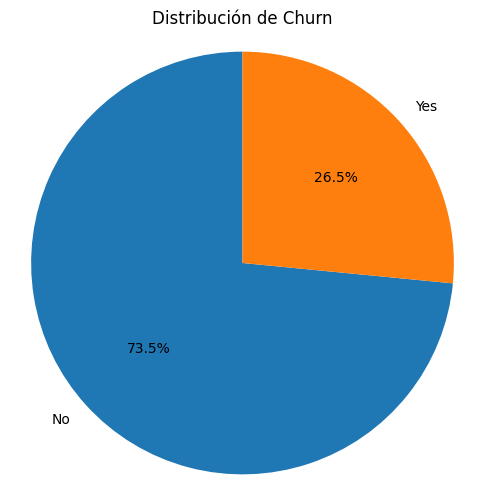

,count
Churn,
No,5174
Yes,1869


In [ ]:
#----------------------------------------------
# Balance de clases.
#----------------------------------------------
import matplotlib.pyplot as plt

# Conteo
churn_counts = df['Churn'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Churn')
plt.axis('equal')
plt.show()

# Mostrar el conteo de churn.
churn_counts

In [ ]:
df.shape

(7043, 21)

Tambien se identificaron distintos atributos que tienen el tipo incorrecto asignado, los cuales serán corregidos para el óptimo funcionamiento de los modelos.

In [ ]:
#Tipo de dato de cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Se elimina el "CustomerID" puesto que no aporta información relevante para el problema.

In [ ]:
# Quitar el ID
df = df.drop('customerID', axis=1)

Se revisan los valores faltantes y tipo de datos  los datos faltantes y se imputan por la mediana, asi mismo tambien se convierten las columnas al formato adecuado.

In [ ]:
import pandas as pd

# Convertir 'TotalCharges' a numérico sin modificar valores válidos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Reemplazar valores vacíos (NaN) con la mediana de 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convertir 'SeniorCitizen' en categórico
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Mostrar la información del DataFrame actualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<ipython-input-7-dca95e23b8cb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


## Gráfico de barras de las variables categóricas.

A partir de los graficos de barras por churn se puede apreciar lo siguiente:

* **Contrato:** Los clientes con contratos mes a mes tienen una tasa de abandono significativamente mayor que aquellos con contratos a largo plazo (uno o dos años).

* **Servicio de Internet:** Los clientes con servicio de fibra óptica tienden a tener una mayor tasa de abandono en comparación con aquellos con DSL o sin servicio de internet.

* **Facturación electrónica:** Los clientes con facturación electrónica también muestran una tasa de abandono mayor.

* **Método de pago:** Los clientes que pagan con cheque electrónico tienen una mayor probabilidad de abandono.

* **Servicios adicionales:** Los clientes que no tienen servicios adicionales como seguridad en línea, respaldo en línea o soporte técnico tienen mayor incidencia al abandono.

* **Adultos mayores:** Los adultos mayores tienen una tasa de abandono mayor.

<ipython-input-10-ee3ba3258e04>:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


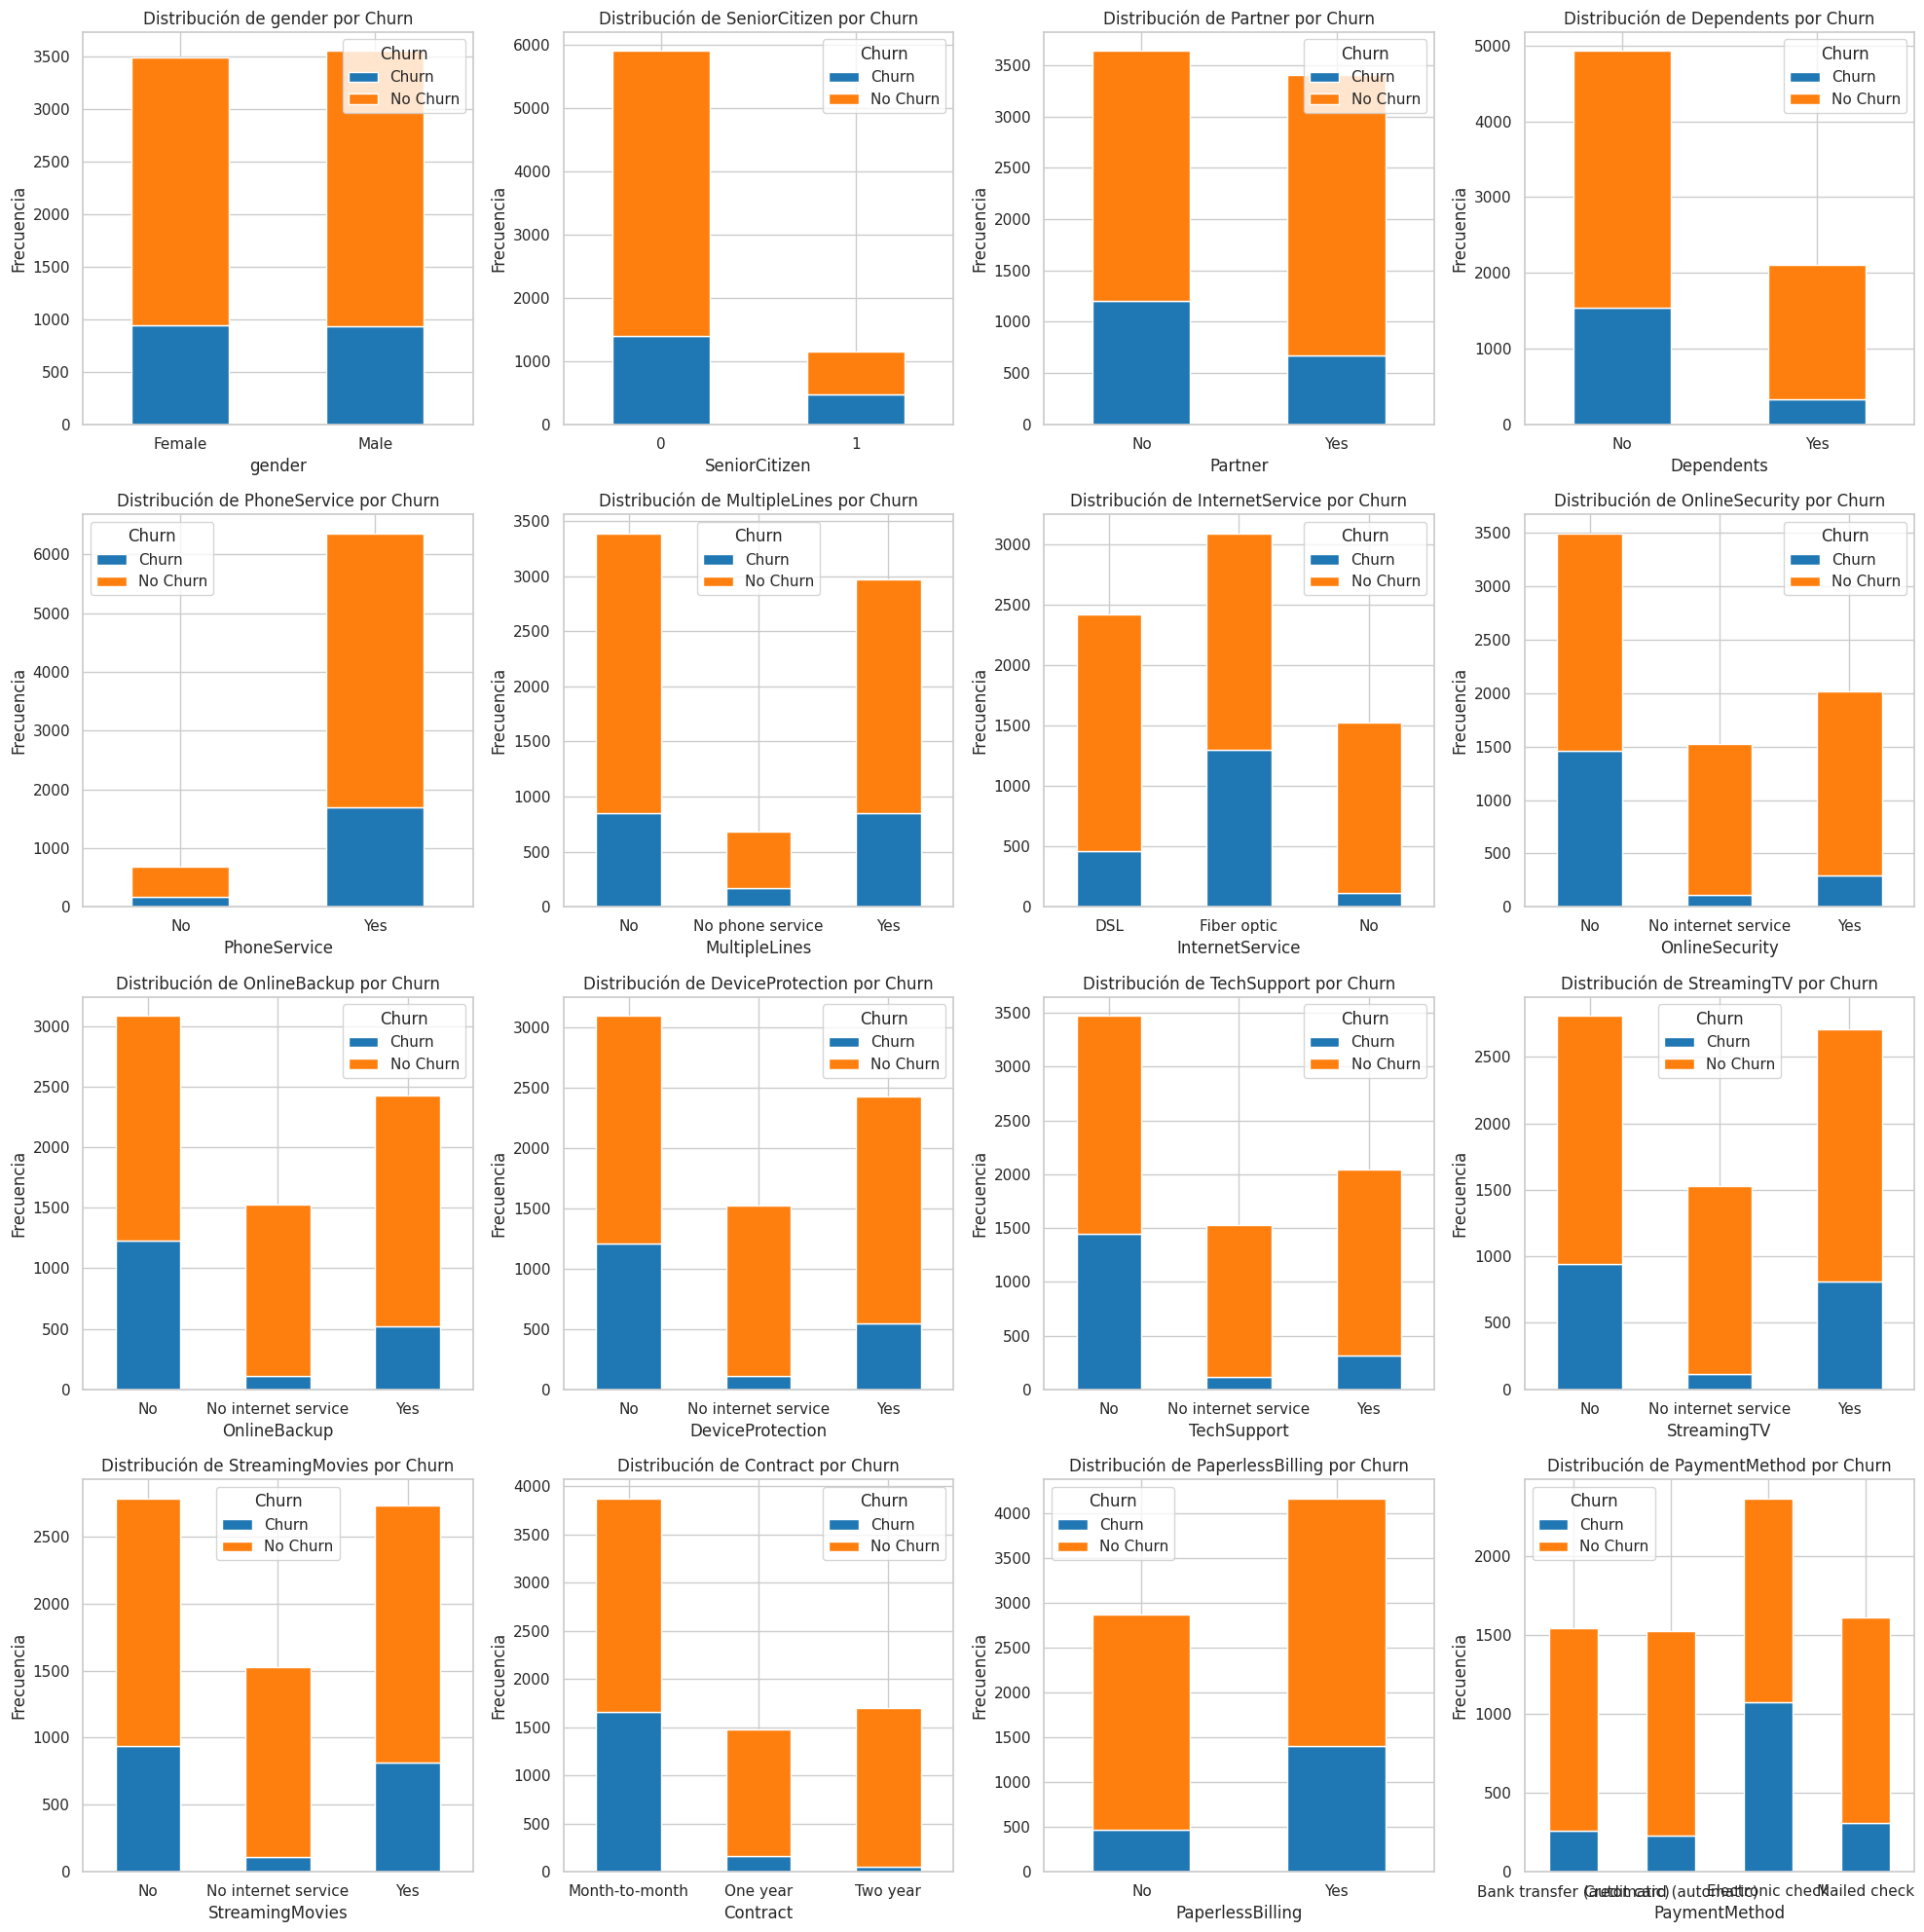

In [ ]:

#----------------------------------------------
# Gráficos de barras variables categóricas.
#----------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Identificar las columnas de tipo 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Calcular el tamaño de la cuadrícula
n_cols = 4  # columnas en la cuadrícula
n_rows = (len(object_columns) + n_cols - 1) // n_cols  # filas

# Crear la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)

# Aplanar la matriz de ejes para un acceso más fácil
axes = axes.flatten()

# Crear un gráfico de barras apiladas para cada columna de tipo 'object'
for i, column in enumerate(object_columns):
    # Crear una tabla cruzada de las categorías con el "Churn"
    data_crosstab = pd.crosstab(df[column], df['Churn'].map({0: 'No Churn', 1: 'Churn'}))

    # Graficar las barras apiladas
    data_crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e'])

    axes[i].set_title(f'Distribución de {column} por Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## V de Cramer

Se evaluó la asociación entre las variables categóricas y la variable objetivo "Churn" utilizando el coeficiente V de Cramer, una métrica que mide la fuerza de la relación entre dos variables categóricas. Este coeficiente se basa en la prueba chi-cuadrado y toma valores entre 0 y 1, donde 0 indica la ausencia de asociación y 1 representa una relación perfecta. De esta manera, se identificaron las variables categóricas con mayor influencia sobre el Churn, permitiendo identificar las más relevantes
para el análisis

In [ ]:
#----------------------------------------------
# V de Cramer asociación variables categóricas.
#----------------------------------------------

import pandas as pd
import numpy as np
import scipy.stats as stats


# Convertir 'Churn' a numérico (Yes -> 1, No -> 0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Seleccionar variables categóricas
categorical_vars = df.select_dtypes(include=["object"]).columns

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calcular Cramér's V para cada variable categórica
correlations = {var: cramers_v(df[var], df["Churn"]) for var in categorical_vars}
correlation_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Cramér's V"])
correlation_df.sort_values(by="Cramér's V", ascending=False)

,Cramér's V
Contract,0.410116
OnlineSecurity,0.347400
TechSupport,0.342916
InternetService,0.322455
PaymentMethod,0.303359
OnlineBackup,0.292316
DeviceProtection,0.281580
StreamingMovies,0.230951
StreamingTV,0.230502
PaperlessBilling,0.191498


A partir de ello se identifica que las variables `Contract`, `OnlineSecurity` y `TechSupport` presentan una influencia fuerte, mientras que `SeniorCitizen`, `Partner`, `MultipleLines`, `PhoneService` y `gender` presentan una influencia debil sobre la variable a predecir.

## Test de Levene

Este test muestra que la diferencia entre las varianzas entre los clientes que abandonaron y que aún son clientes es significativa, lo cual se puede apreciar de manera gráfica en el boxplot de variables numéricas.

In [ ]:
#----------------------------------------------
# Prueba de Levene
#----------------------------------------------

from scipy.stats import levene

# Ejemplo de datos
group0 = df[df["Churn"] == 0]["tenure"]  # Clientes sin churn
group1 = df[df["Churn"] == 1]["tenure"]  # Clientes con churn

# Realizar la prueba de Levene
stat, p_value = levene(group0, group1)

print(f"Estadístico de Levene: {stat:.3f}")
print(f"Valor p: {p_value:.5f}")

Estadístico de Levene: 417.170
Valor p: 0.00000


## Analisis de relación entre variables y clasificación

Seguidamente, se querrá verificar la relación de las variables numéricas con la variable objetivo (Churn) e identificar las características de los individuos que aún son parte de la compañía y aquellos que ya se fueron. Una opción para evaluar la variabilidad entre grupos y dentro de cada uno de ellos podría ser el test de análisis de varianza (ANOVA). Esta es una técnica que se utiliza para comparar las medias de dos o más grupos y determinar si existen diferencias significativas entre ellos.

Antes de proceder con ello, se debe evaluar si se cumplen los supuestos de dicha prueba, para asegurarse de que los resultados que obtengamos sean fiables. Así que se verificarán la normalidad de los residuos y la homogeneidad de las varianzas.

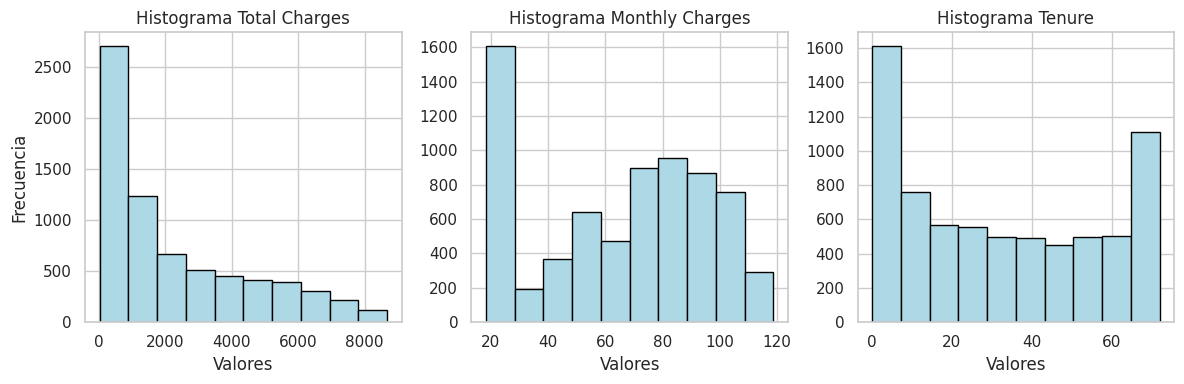

In [ ]:
#----------------------------------------------
# Histograma Variables numéricas.
#----------------------------------------------


plt.figure(figsize=(12, 4))

# Histograma de TotalCharges
plt.subplot(1, 3, 1)
plt.hist(df['TotalCharges'], color='lightblue', edgecolor='black')
plt.title("Histograma Total Charges")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Histograma de MonthlyCharges
plt.subplot(1, 3, 2)
plt.hist(df['MonthlyCharges'], color='lightblue', edgecolor='black')
plt.title("Histograma Monthly Charges")
plt.xlabel("Valores")

# Histograma de Tenure
plt.subplot(1, 3, 3)
plt.hist(df['tenure'], color='lightblue', edgecolor='black')
plt.title("Histograma Tenure")
plt.xlabel("Valores")

plt.tight_layout()
plt.show()

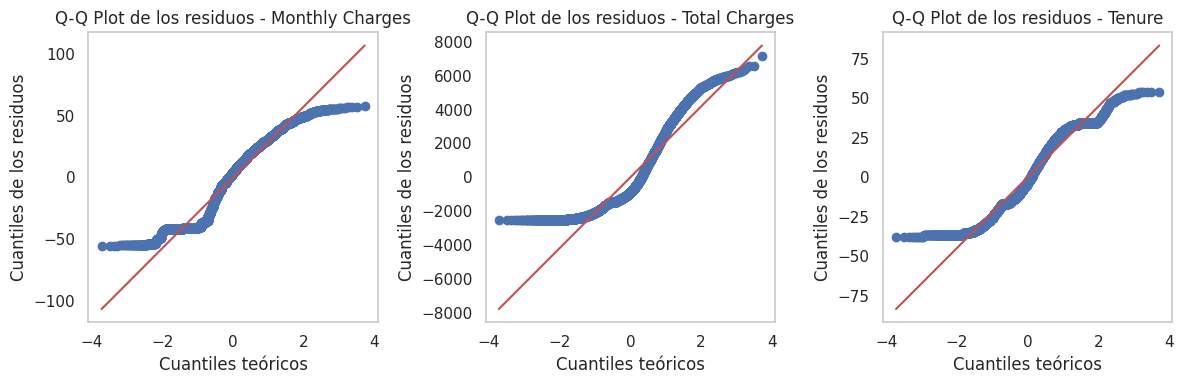

In [ ]:
#----------------------------------------------
# Normalidad
#----------------------------------------------

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Ajustar modelos ANOVA
modelo_1 = smf.ols('MonthlyCharges ~ C(Churn)', data=df).fit()
modelo_2 = smf.ols('TotalCharges ~ C(Churn)', data=df).fit()
modelo_3 = smf.ols('tenure ~ C(Churn)', data=df).fit()

# Obtener los residuos
residuals_1 = modelo_1.resid
residuals_2 = modelo_2.resid
residuals_3 = modelo_3.resid

# Crear gráficos Q-Q
plt.figure(figsize=(12, 4))

# Q-Q Plot para Monthly Charges
plt.subplot(1, 3, 1)
stats.probplot(residuals_1, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos - Monthly Charges")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los residuos")
plt.grid()

# Q-Q Plot para Total Charges
plt.subplot(1, 3, 2)
stats.probplot(residuals_2, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos - Total Charges")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los residuos")
plt.grid()

# Q-Q Plot para Tenure
plt.subplot(1, 3, 3)
stats.probplot(residuals_3, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos - Tenure")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los residuos")
plt.grid()

plt.tight_layout()
plt.show()

Como se puede evidenciar en los gráficos anteriores, la distribución no pareciera seguir una distribución normal, ya que en los histogramas se ven distribuciones sesgadas o multimodales, y los qq-plot muestran desviaciones de la diagonal en los valores más altos y más bajos. Y con respecto a la homogeneidad de las varianzas, se realizó un test de Levene (dado que es más robusto ante desviaciones de normalidad) y para las 3 variables se obtuvieron resultados donde se rechazan la hipótesis nula de homocedasticidad.

Debido a esto, se optará por una alternativa que permita medir la relación entre variables sin asumir normalidad, para lo cual, se usará el **Welch’s t-test**.

## Welch’s t-test

Mediante este test se puede determinar si existe una diferencia significativa en la media de cada variable numérica entre los clientes que cancelaron el servicio (Churn= 1) y aquellos que no lo hicieron (Churn = 0). En este caso se observa que hay una relación significativa entre estas variables y el Churn por lo cual las diferencias entre ambos grupos no son aleatorias.

Esto implica que los clientes con menor antigüedad tienen una mayor probabilidad de abandonar, al igual que aquellos con cargos mensuales más altos

In [ ]:
#----------------------------------------------
# Welch’s t-test
#----------------------------------------------

from scipy.stats import ttest_ind

numerical_vars = df.select_dtypes(include=['number']).columns
# Aplicar Welch's t-test a cada variable numérica
welch_results = {}

for var in numerical_vars:
    group0 = df[df["Churn"] == 0][var]  # Clientes sin churn
    group1 = df[df["Churn"] == 1][var]  # Clientes con churn

    stat, p = ttest_ind(group0, group1, equal_var=False)  # Welch’s t-test
    welch_results[var] = p  # Guardar p-value

# Convertir a DataFrame y ordenar
welch_df = pd.DataFrame.from_dict(welch_results, orient="index", columns=["p-value"])
welch_df = welch_df.sort_values(by="p-value", ascending=True)

# Mostrar resultados
print(welch_df)

                      p-value
Churn            0.000000e+00
tenure          1.195495e-232
TotalCharges     2.059075e-75
MonthlyCharges   8.592449e-73


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## Boxplot variables numéricas.

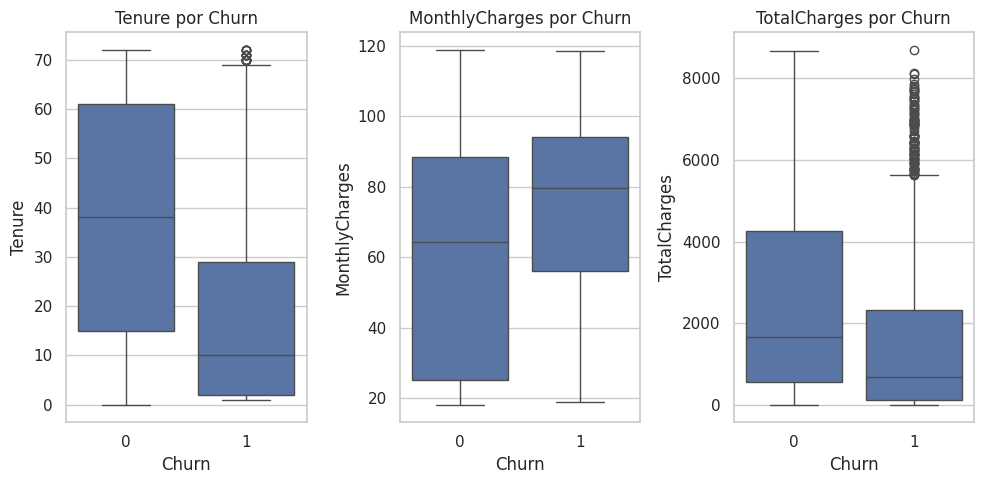

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------
#Boxplot de variables numéricas
#----------------------------------------------

# Crear una figura con 3 subplots (1 fila y 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # 1 fila, 3 columnas, tamaño de la figura

# Boxplot para tenure
sns.boxplot(x="Churn", y="tenure", data=df, ax=axes[0])
axes[0].set_title("Tenure por Churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Tenure")

# Boxplot para MonthlyCharges
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=axes[1])
axes[1].set_title("MonthlyCharges por Churn")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("MonthlyCharges")

# Boxplot para TotalCharges
sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=axes[2])
axes[2].set_title("TotalCharges por Churn")
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("TotalCharges")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pointbiserialr

#----------------------------------------------
# Resumen estadístico de variables numéricas
#----------------------------------------------
print(df.describe())

            tenure  MonthlyCharges  TotalCharges        Churn
count  7043.000000     7043.000000   7043.000000  7043.000000
mean     32.371149       64.761692   2281.916928     0.265370
std      24.559481       30.090047   2265.270398     0.441561
min       0.000000       18.250000     18.800000     0.000000
25%       9.000000       35.500000    402.225000     0.000000
50%      29.000000       70.350000   1397.475000     0.000000
75%      55.000000       89.850000   3786.600000     1.000000
max      72.000000      118.750000   8684.800000     1.000000


## Preprocesamiento de datos

Corregir las categórias de las variables, se reemplaza "No internet service" con "No", para facilitar el análisis y la interpretación de los resultados del modelo.

In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama df

# Lista de columnas que tienen la categoría "No internet service"
columns_to_adjust = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Reemplazar "No internet service" con "No" en las columnas especificadas
for column in columns_to_adjust:
    df[column] = df[column].replace("No internet service", "No")

# Verificar los cambios
print(df[columns_to_adjust].head())

      MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0  No phone service             No          Yes               No          No   
1                No            Yes           No              Yes          No   
2                No            Yes          Yes               No          No   
3  No phone service            Yes           No              Yes         Yes   
4                No             No           No               No          No   

  StreamingTV StreamingMovies  
0          No              No  
1          No              No  
2          No              No  
3          No              No  
4          No              No  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Separar características (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Preparación de datos para aplicar los modelos:

Se aplica la transformación de StandardScaler para las variables numéricas, lo que estandariza los datos al centrar la media en cero y ajustar la desviación estándar a uno. Para las variables categóricas, se utiliza OneHotEncoder, que convierte cada categoría en una columna binaria independiente, permitiendo al modelo procesar correctamente los datos categóricos sin introducir un orden arbitrario.

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer  # Para aplicar transformaciones
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # Para escalar y codificar variables


# Identificar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Crear un transformador para codificar variables categóricas y escalar numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Aplicar el preprocesamiento a los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fase 2 : Construcción de los modelos.
A continuación se construirán los dos modelos y se evaluará el rendimiento de cada uno, así como sus salidas, para poder comparar su efectividad en la identificación del churn y determinar cuál ofrece un mejor desempeño según las métricas clave, especialmente el recall, con el objetivo de maximizar la detección de clientes propensos a abandonar el servicio y contribuir a la generación de estrategias de retención.

En la construcción de los dos modelos se usaron distintas técnicas para el tratamiento de clases desbalanceadas, las cuales se exponen a continuación:

**SMOTE (Synthetic Minority Over-sampling Technique)**
SMOTE es una técnica de sobremuestreo utilizada para equilibrar datasets desbalanceados. En lugar de duplicar las muestras existentes de la clase minoritaria, SMOTE crea nuevas muestras sintéticas generando puntos intermedios entre las muestras reales y sus vecinos más cercanos mediante la interpolación de características, lo que ayuda a proporcionar más variedad en los ejemplos de la clase minoritaria.

El principal beneficio de SMOTE es que ayuda a reducir el sesgo hacia la clase mayoritaria, permitiendo que los modelos de clasificación aprendan mejor las características de la clase minoritaria, aunque es posible que al generar muestras sintéticas de manera lineal, podría introducir ruido en el modelo si las clases no estan bien definidas.

<br>

**RandomUnderSampler**

RandomUnderSampler es una técnica de submuestreo que se enfoca en reducir el tamaño de la clase mayoritaria para equilibrar las clases en un dataset desbalanceado. Funciona seleccionando aleatoriamente un subconjunto de muestras de la clase mayoritaria y eliminando el resto, lo cual simplifica el problema al tener un conjunto de datos más pequeño y balanceado. Es de utilidad cuando se quiere reducir el tiempo de entrenamiento del modelo y cuando la clase mayoritaria tiene muchas muestras redundantes. Sin embargo, su principal inconveniente es la posible pérdida de información valiosa, ya que descarta datos reales de la clase mayoritaria, lo que podría afectar negativamente el rendimiento.

<br>

**ADASYN (Adaptive Synthetic Sampling)**

ADASYN es una técnica similar a SMOTE, pero  que introduce un enfoque adaptativo para generar muestras sintéticas. En lugar de crear nuevas muestras de manera uniforme, ADASYN se concentra en las regiones donde la clase minoritaria es más difícil de clasificar, mediante la generación de muestras sintéticas en las áreas con menor densidad de ejemplos de la clase minoritaria.
Su objetivo no es solo equilibrar las clases, sino también mejorar la capacidad del modelo para aprender patrones complejos. Al priorizar las zonas difíciles, ayuda a reducir el sesgo del clasificador y mejora su rendimiento en la predicción de la clase minoritaria. Sin embargo, este enfoque también puede aumentar el riesgo de sobreajuste en áreas ruidosas o con datos atípicos.

<br>

**SMOTEENN (SMOTE + Edited Nearest Neighbors)**

SMOTEENN es una técnica híbrida que combina el sobremuestreo de SMOTE con el submuestreo de Edited Nearest Neighbors (ENN). Primero, SMOTE genera muestras sintéticas para la clase minoritaria, equilibrando la distribución de las clases. Luego, ENN elimina las muestras ruidosas o ambiguas que no coinciden bien con sus vecinos más cercanos, mejorando así la calidad del dataset.La principal ventaja de esta téctinca es que genera nuevos ejemplos de la clase minoritaria y al tiempo limpia el dataset eliminando el ruido. Es de utilidad cuando se requiere de un mejor balance de clases para evitar que el modelo aprenda partrones erroneos.

---


 ## Modelo 1 :Random Forest.

El Random Forest es un algoritmo de aprendizaje automático basado en el enfoque de ensamblado (ensemble learning), que utiliza múltiples árboles de decisión para realizar tareas de clasificación y regresión. Se construye generando varios árboles de decisión independientes a partir de subconjuntos aleatorios del conjunto de datos original mediante la técnica de bagging (Bootstrap Aggregating). Durante el entrenamiento, cada árbol recibe un subconjunto de muestras y, en cada división de nodo, se selecciona aleatoriamente un subconjunto de características para determinar la mejor división. Esta aleatoriedad en la selección de muestras y características reduce la correlación entre los árboles, lo que mejora la generalización del modelo y disminuye el riesgo de sobreajuste (overfitting). La predicción en el Random Forest se obtiene mediante un proceso de agregación. En problemas de clasificación, cada árbol genera una predicción y la clase final se determina por votación mayoritaria de todos los árboles.

<br>

A continuación se detallan los hiperparámetros de este modelo, los cuales controlan el comportamiento del modelo y se definen antes del entrenamiento:

**n_estimators:** Número de árboles en el bosque. Cuantos más árboles, mejor será la generalización del modelo a coste de un mayor coste de computo. Un valor muy bajo puede resultar en un modelo subajustado, mientras que un valor muy alto puede ser innecesariamente costoso.

**max_depth:** Profundidad máxima de cada árbol. Controla qué tan profundo puede crecer cada árbol. Es importante limitarlo puedto que puede ocurrir que todas las hojas contengan una sola clase, cual puede llevar al sobreajuste del modelo

**min_samples_split:** Número mínimo de muestras requeridas para dividir un nodo interno. Este no se dividira si contiene menos muestras que este valor, ayudando a controlar la complejidad del modelo

**min_samples_leaf:** Número mínimo de muestras requeridas en un nodo hoja. Esto ayuda a controlar el sobreajuste del modelo al evitar hojas con pocas muestras.

**max_features:** Número máximo de características a considerar en cada división de un nodo.Este hiperparámetro introduce aleatoriedad en la selección de características, lo cual ayuda a reducir la correlación entre los árboles y mejorar la capacidad de generalización del modelo

**bootstrap:** Indica si se deben usar muestras bootstrap (subconjuntos aleatorios del conjunto de datos) para entrenar cada árbol.

**class_weight:** Ponderación de las clases para manejar conjuntos de datos desbalanceados.Asigna más peso a la clase minoritaria para equilibrar el impacto de las clases en el modelo.

**criterion:** Función para medir la calidad de una división en los nodos. Determina cómo se evalúa la mejor división en cada nodo. Las opciones comunes son 'gini' (índice de Gini) para clasificación y 'entropy' (ganancia de información).

---

**Busqueda de hiperparametros:**

La selección de los hiperparámetros para este caso se realizó mediante la técnica de optimización **"RandomizedSearchCV"** la cual selecciona aleatoriamente un número predefinido de combinaciones de hiperparámetros dentro de un espacio definido, permitiendo evaluar el rendimiento del modelo en distintas configuraciones.Existe otra alternativa llamada "GridSearchCV" que garantiza la mejor combinación de hiperparámetros dentro del los criterios dados, sin embargo este método es más costoso computacionalmente y por ello se decidio usar **"RandomizedSearchCV"** que es más eficiente.

**Validación Cruzada Estratificada:**

Se usó StratifiedKFold para la validación cruzada del modelo, dividiendo los datos en k subconjuntos que garantien que cada uno contenga la misma proporcion que el conjunto original, esto es importante en este caso dado el desbalance de las clases entre "churn" y "no churn". Esto ayuda a que las estimaciones del modelo sean mas robustas y minimiza sesgos en su evaluación.

---








Evaluando con SMOTE
Distribución de clases tras SMOTE: Counter({0: 3622, 1: 2897})

Resultados del Modelo con SMOTE

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.496273 |
+----------------------+----------+
| Recall               | 0.83066  |
+----------------------+----------+
| F1-Score             | 0.621333 |
+----------------------+----------+
| Especificidad        | 0.695232 |
+----------------------+----------+
| ROC-AUC              | 0.826168 |
+----------------------+----------+
| Precision-Recall AUC | 0.615293 |
+----------------------+----------+


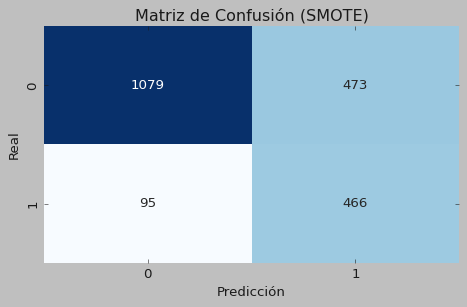

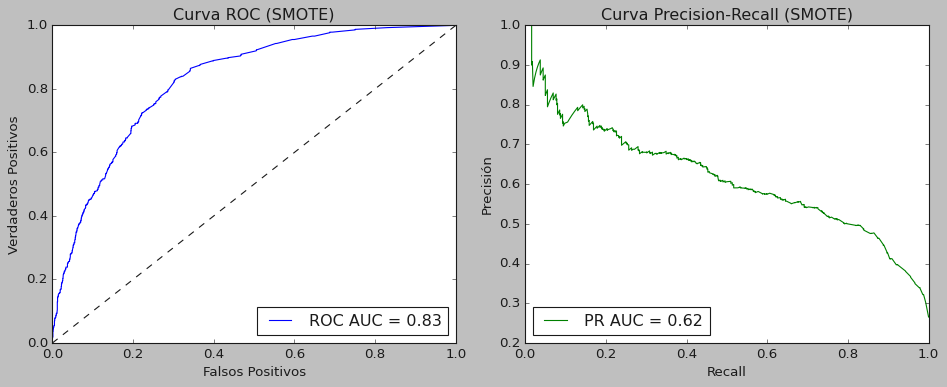


Evaluando con RandomUnderSampler
Distribución de clases tras RandomUnderSampler: Counter({0: 1635, 1: 1308})

Resultados del Modelo con RandomUnderSampler

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.531443 |
+----------------------+----------+
| Recall               | 0.768271 |
+----------------------+----------+
| F1-Score             | 0.62828  |
+----------------------+----------+
| Especificidad        | 0.755155 |
+----------------------+----------+
| ROC-AUC              | 0.836334 |
+----------------------+----------+
| Precision-Recall AUC | 0.632728 |
+----------------------+----------+


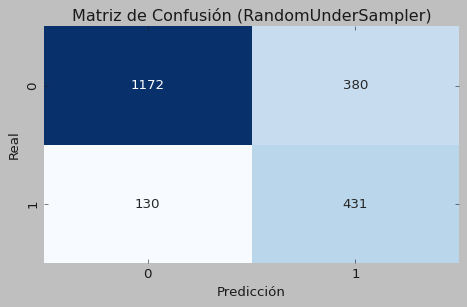

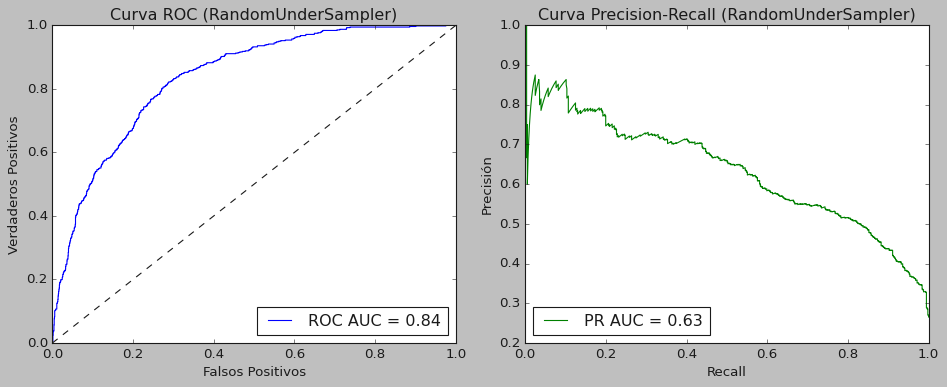


Evaluando con ADASYN
Distribución de clases tras ADASYN: Counter({0: 3622, 1: 2579})

Resultados del Modelo con ADASYN

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.510107 |
+----------------------+----------+
| Recall               | 0.764706 |
+----------------------+----------+
| F1-Score             | 0.611983 |
+----------------------+----------+
| Especificidad        | 0.734536 |
+----------------------+----------+
| ROC-AUC              | 0.819772 |
+----------------------+----------+
| Precision-Recall AUC | 0.598376 |
+----------------------+----------+


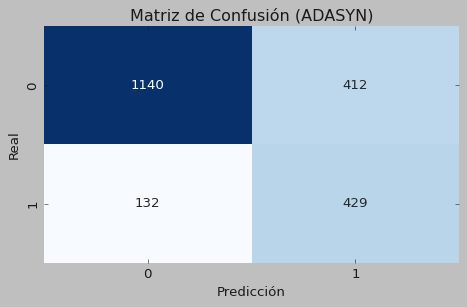

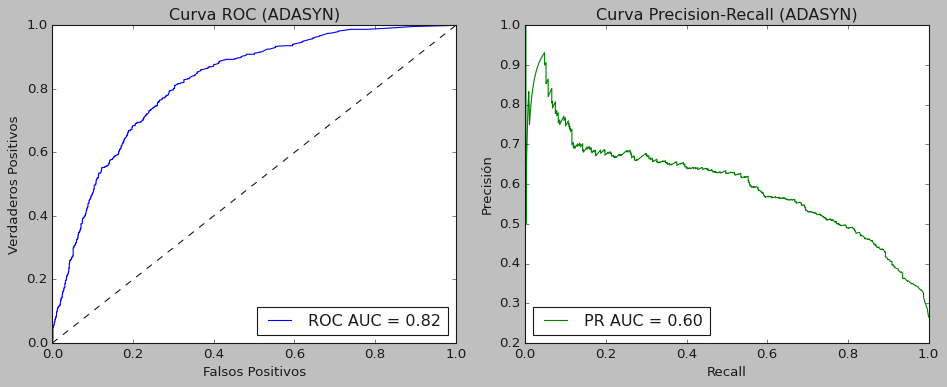


Evaluando con SMOTEENN
Distribución de clases tras SMOTEENN: Counter({0: 1977, 1: 1839})

Resultados del Modelo con SMOTEENN

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.53366  |
+----------------------+----------+
| Recall               | 0.777184 |
+----------------------+----------+
| F1-Score             | 0.632801 |
+----------------------+----------+
| Especificidad        | 0.75451  |
+----------------------+----------+
| ROC-AUC              | 0.835611 |
+----------------------+----------+
| Precision-Recall AUC | 0.644698 |
+----------------------+----------+


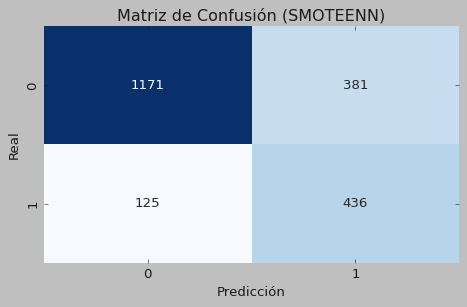

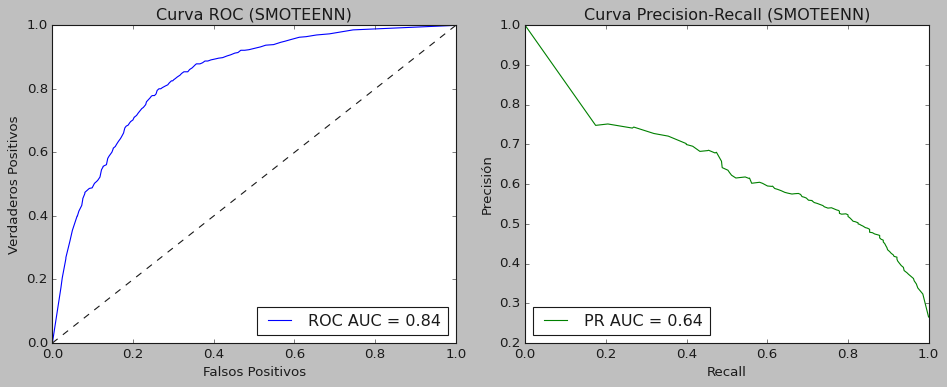

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, recall_score, f1_score, precision_score,
    precision_recall_curve, roc_auc_score, roc_curve, auc
)
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
plt.style.use('classic')
sns.set_palette('Set2')

#----------------------------------------------
# Definir las estrategias de balanceo
#----------------------------------------------

balance_strategies = {
    'SMOTE': SMOTE(sampling_strategy=0.8, random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy=0.8, random_state=42),
    'ADASYN': ADASYN(sampling_strategy=0.8, random_state=42),
    'SMOTEENN': SMOTEENN(sampling_strategy=0.8, random_state=42)
}

#----------------------------------------------
# Espacio de hiperparámetros para Random Forest
#----------------------------------------------
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'criterion': ['gini'],
    'class_weight': [None, 'balanced_subsample']
}

# Configuración del modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

#----------------------------------------------
# Configurar RandomizedSearchCV con validación cruzada estratificada
#----------------------------------------------
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=32,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1,
    random_state=42)

#----------------------------------------------
# Bucle para evaluar cada técnica de balanceo
#----------------------------------------------

best_models = {}

for method_name, balancer in balance_strategies.items():
    print(f"\n{'='*40}\nEvaluando con {method_name}\n{'='*40}")

    # Aplicar el balanceo de clases
    X_train_balanced, y_train_balanced = balancer.fit_resample(X_train_preprocessed, y_train)
    print(f"Distribución de clases tras {method_name}: {Counter(y_train_balanced)}")

    # Ajustar el modelo a los datos balanceados
    random_search_rf.fit(X_train_balanced, y_train_balanced)

    # Obtener el mejor modelo ajustado y guardarlo
    best_rf_model = random_search_rf.best_estimator_
    best_models[method_name] = best_rf_model

    # Predecir las probabilidades en el conjunto de prueba
    y_pred_proba_rf = best_rf_model.predict_proba(X_test_preprocessed)[:, 1]

    # Ajustar el umbral para maximizar el F1-Score
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rf)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_threshold = thresholds[np.argmax(f1_scores)]

    # Predecir usando el umbral óptimo
    y_pred_rf = (y_pred_proba_rf >= optimal_threshold).astype(int)

    # Evaluar el modelo
    precision_value = precision_score(y_test, y_pred_rf)
    recall_value = recall_score(y_test, y_pred_rf)
    f1_value = f1_score(y_test, y_pred_rf)
    roc_auc_value = roc_auc_score(y_test, y_pred_proba_rf)

    # Calcular la especificidad
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
    specificity_value = tn / (tn + fp)

    # Calcular Precision-Recall AUC
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_pred_proba_rf)
    pr_auc_value = auc(recall_pr, precision_pr)

    # Crear un DataFrame para mostrar las métricas
    metrics_df = pd.DataFrame({
        'Métrica': ['Precisión', 'Recall', 'F1-Score', 'Especificidad', 'ROC-AUC', 'Precision-Recall AUC'],
        'Valor': [precision_value, recall_value, f1_value, specificity_value, roc_auc_value, pr_auc_value]
    })

    # Mostrar la tabla de métricas
    print(f"\nResultados del Modelo con {method_name}\n")
    print(metrics_df.to_markdown(index=False, tablefmt="grid"))

    # Matriz de confusión
    confusion = confusion_matrix(y_test, y_pred_rf)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión ({method_name})')
    plt.tight_layout()
    plt.show()

    # Crear subplots para las curvas
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
    axes[0].plot(fpr, tpr, label=f'ROC AUC = {roc_auc_value:.2f}', color='blue')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_xlabel('Falsos Positivos')
    axes[0].set_ylabel('Verdaderos Positivos')
    axes[0].set_title(f'Curva ROC ({method_name})')
    axes[0].legend(loc='lower right')

    # Curva Precision-Recall
    axes[1].plot(recall_pr, precision_pr, label=f'PR AUC = {pr_auc_value:.2f}', color='green')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precisión')
    axes[1].set_title(f'Curva Precision-Recall ({method_name})')
    axes[1].legend(loc='lower left')

    plt.tight_layout()
    plt.show()



## Importancia de las variables en el churn.

A continuación se resalta los aspectos mas relevantes sobre la importancia de las variables para la predicción del churn de todas las estrategias de balanceo usadas:

El análisis de la importancia de las características muestra que la permanencia del cliente con la empresa ('tenure') es el factor más influyente en la decisión de cancelar el servicio. Le siguen de cerca la suscripción al servicio de internet de fibra óptica ('InternetService_Fiber optic') y los contratos a largo plazo ('Contract_Two year'). Esto indica que la lealtad del cliente, la calidad del servicio de internet y la estabilidad contractual son aspectos importantes. Asimismo, el los cargos mensuales y totales ('MonthlyCharges' y 'TotalCharges'), también desempeñan un papel relevante. El uso del método de pago mediante cheque electrónico ('PaymentMethod_Electronic check') destaca por su importancia, sugiriendo una posible relación con la variable objetivo. Por último, la ausencia de servicio de internet ('InternetService_No'), los contratos anuales ('Contract_One year') y la contratación de servicios de seguridad en línea y soporte técnico ('OnlineSecurity_Yes' y 'TechSupport_Yes') tienen un impacto moderado en la variable objetivo.


Importancia de Características con SMOTE


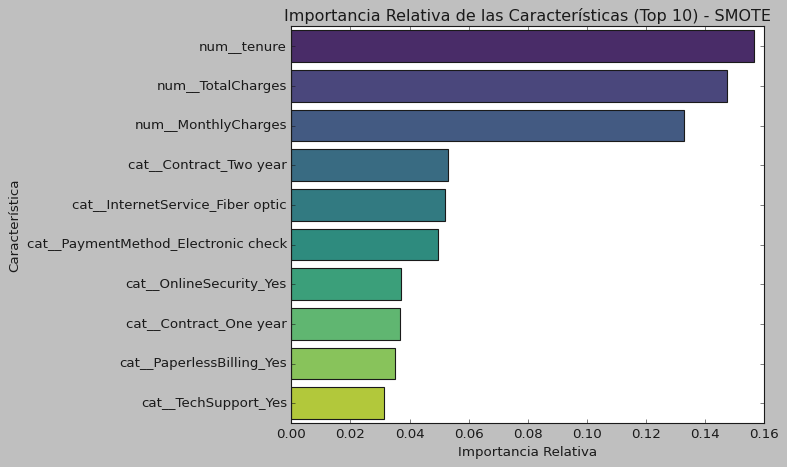


Importancia Relativa de las Características

| Feature                             |   Relative Importance |
|:------------------------------------|----------------------:|
| num__tenure                         |             0.15643   |
| num__TotalCharges                   |             0.147429  |
| num__MonthlyCharges                 |             0.132732  |
| cat__Contract_Two year              |             0.0529291 |
| cat__InternetService_Fiber optic    |             0.0520098 |
| cat__PaymentMethod_Electronic check |             0.0496175 |
| cat__OnlineSecurity_Yes             |             0.0371649 |
| cat__Contract_One year              |             0.0366601 |
| cat__PaperlessBilling_Yes           |             0.0350967 |
| cat__TechSupport_Yes                |             0.0314801 |

Importancia de Características con RandomUnderSampler


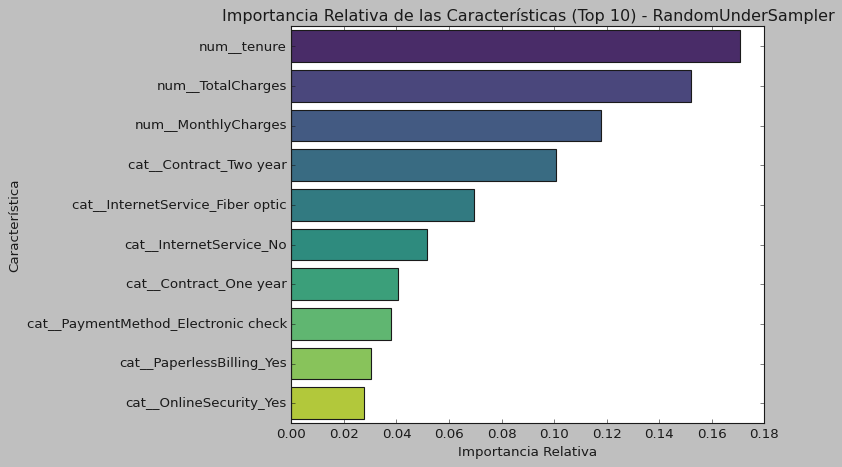


Importancia Relativa de las Características

| Feature                             |   Relative Importance |
|:------------------------------------|----------------------:|
| num__tenure                         |             0.170659  |
| num__TotalCharges                   |             0.151977  |
| num__MonthlyCharges                 |             0.11776   |
| cat__Contract_Two year              |             0.100866  |
| cat__InternetService_Fiber optic    |             0.0696335 |
| cat__InternetService_No             |             0.0516814 |
| cat__Contract_One year              |             0.0406864 |
| cat__PaymentMethod_Electronic check |             0.0378742 |
| cat__PaperlessBilling_Yes           |             0.0304689 |
| cat__OnlineSecurity_Yes             |             0.0277417 |

Importancia de Características con ADASYN


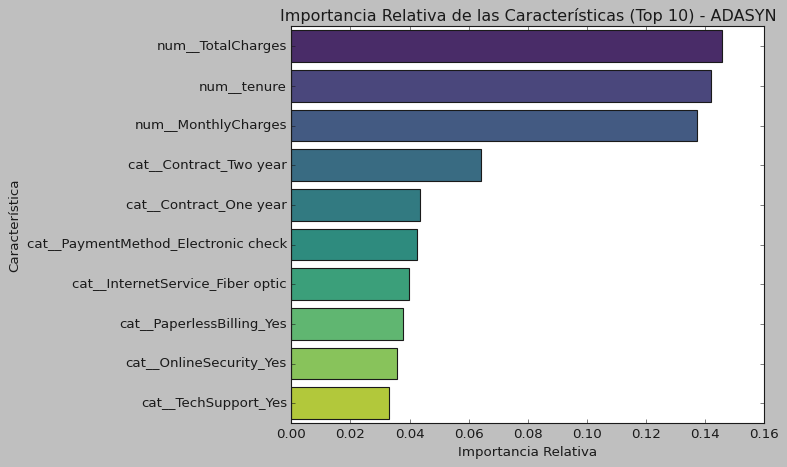


Importancia Relativa de las Características

| Feature                             |   Relative Importance |
|:------------------------------------|----------------------:|
| num__TotalCharges                   |             0.145732  |
| num__tenure                         |             0.14194   |
| num__MonthlyCharges                 |             0.137238  |
| cat__Contract_Two year              |             0.0642678 |
| cat__Contract_One year              |             0.0436815 |
| cat__PaymentMethod_Electronic check |             0.0424037 |
| cat__InternetService_Fiber optic    |             0.0398989 |
| cat__PaperlessBilling_Yes           |             0.0376715 |
| cat__OnlineSecurity_Yes             |             0.035648  |
| cat__TechSupport_Yes                |             0.0331313 |

Importancia de Características con SMOTEENN


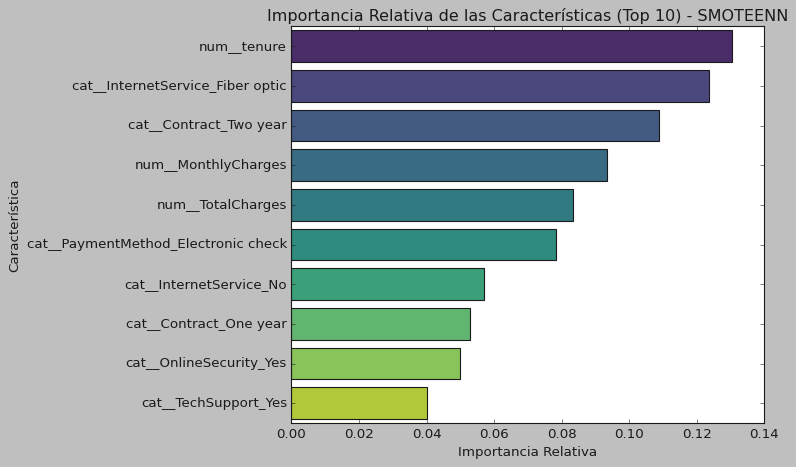


Importancia Relativa de las Características

| Feature                             |   Relative Importance |
|:------------------------------------|----------------------:|
| num__tenure                         |             0.130508  |
| cat__InternetService_Fiber optic    |             0.123529  |
| cat__Contract_Two year              |             0.108675  |
| num__MonthlyCharges                 |             0.0933879 |
| num__TotalCharges                   |             0.083451  |
| cat__PaymentMethod_Electronic check |             0.0784227 |
| cat__InternetService_No             |             0.0569529 |
| cat__Contract_One year              |             0.0528998 |
| cat__OnlineSecurity_Yes             |             0.0499534 |
| cat__TechSupport_Yes                |             0.0400728 |


In [ ]:
#--------------------------------------------------
# Calcular y mostrar la importancia relativa como porcentaje
#--------------------------------------------------

for method_name, model in best_models.items():
    print(f"\n{'='*60}\nImportancia de Características con {method_name}\n{'='*60}")

    # Crear un DataFrame con las importancias de las características
    feature_importances = pd.DataFrame({
        'Feature': preprocessor.get_feature_names_out(),
        'Importance': model.feature_importances_
    })

    # Calcular la importancia relativa
    feature_importances['Relative Importance'] = feature_importances['Importance'] / feature_importances['Importance'].sum()

    # Ordenar las características por importancia relativa de mayor a menor
    feature_importances = feature_importances.sort_values(by='Relative Importance', ascending=False)

    # Visualizar las 10 características más importantes con su importancia relativa
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Relative Importance',
        y='Feature',
        hue='Feature',  # Asignar la variable y a hue
        data=feature_importances.head(10),
        palette='viridis',
        dodge=False,
        legend=False  # Desactivar la leyenda
    )
    plt.title(f'Importancia Relativa de las Características (Top 10) - {method_name}')
    plt.xlabel('Importancia Relativa')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

    # Mostrar la tabla de importancias relativas
    print("\nImportancia Relativa de las Características\n")
    print(feature_importances[['Feature', 'Relative Importance']].head(10).to_markdown(index=False, tablefmt="pipe"))






## Evaluación de los resultados Random Forest.

**SMOTE**
* Logra el recall más alto (0.83066), lo implica que identifica correctamente la mayor cantidad de clientes que abandonan. Esto es ideal si el objetivo principal es minimizar los falsos negativos (clientes que abandonan pero no son detectados). Sin embargo, su precisión es la más baja (0.496273), lo que indica una alta tasa de falsos positivos (clientes predichos como abandonos que en realidad no lo son), lo cual podría llevar a esfuerzos y costos adicionales. SMOTE es una buena opción si se prioriza prioriza la detección de abandonos sobre la eficiencia en las acciones de retención.

<br>

**RandomUnderSampler**

* RandomUnderSampler ofrece un buen equilibrio entre precisión (0.531443) y recall (0.768271), con un ROC-AUC más alto (0.836334), lo que indica una buena capacidad de clasificación. Además, tiene una especificidad alta (0.755155), lo que significa que identifica correctamente a los clientes que no abandonan. Esta técnica es útil cuando se busca un balance entre identificar abandonos y minimizar falsos positivos, especialmente si los recursos para retención son limitados. Sin embargo, al reducir el tamaño del dataset, se pierde información de la clase mayoritaria, lo que podría afectar la generalización del modelo.

<br>

**ADASYN**

* ADASYN tiene un desempeño similar a SMOTE, con un recall ligeramente menor (0.764706) pero una precisión un poco mayor (0.510107). Esto sugiere que ADASYN genera menos falsos positivos que SMOTE, pero también identifica menos clientes que abandonan. Su ROC-AUC (0.819772) y Precision-Recall AUC (0.598376) son competitivos, pero no superan a otras técnicas como SMOTEENN o RandomUnderSampler. ADASYN es una opción intermedia, útil si se busca un equilibrio entre recall y precisión, pero no destaca en ningún aspecto específico.

<br>

**SMOTEENN**

* SMOTEENN combina la generación de muestras sintéticas (SMOTE) con un paso adicional de limpieza (ENN), lo que resulta en el F1-Score más alto (0.632801) y el Precision-Recall AUC más alto (0.644698). Esto indica un mejor equilibrio entre precisión y recall en comparación con las otras técnicas. Además, su recall (0.777184) y precisión (0.53366) son competitivos, lo que la convierte en una opción sólida para problemas de Churn. SMOTEENN es especialmente recomendable cuando se busca maximizar la identificación de abandonos sin sacrificar demasiado la precisión, y es la mejor opción general en este análisis.

---
## Modelo 2: Perceptrón Multicapa (MLP)

El Perceptrón Multicapa (Multi-Layer Perceptron, MLP) es un modelo de aprendizaje automático basado en redes neuronales artificiales, diseñado para resolver problemas de clasificación y regresión. Se compone de múltiples capas de neuronas (unidades) organizadas en una estructura jerárquica contando con una capa de entrada, una o varias ocultas y una capa de salida. Cada neurona en una capa está conectada a todas las neuronas de la capa siguiente mediante pesos ajustables, y cada conexión tiene una función de activación no lineal (como ReLU, Sigmoid o Tanh) que introduce la capacidad de modelar relaciones complejas en los datos.

Durante el entrenamiento, el MLP utiliza el algoritmo de backpropagation (retropropagación del error) en combinación con un optimizador, como Stochastic Gradient Descent (SGD) o Adam, para poder ajustar los pesos de las conexiones neuronales minimizar el error en las predicciones. Mediante el uso de múltiples capas ocultas se puede lograr que el MLP aprenda a reconocer patrones complejos en conjuntos de datos.

<br>
A continuación se mencionan los hiperparámetros del Perceptrón Multicapa:

**hidden_layer_sizes:** Define la cantidad de capas ocultas y el número de neuronas en cada capa, entre mayor sea la cantidad de neuronas y capas se puede capturar patrones más complejos, pero también aumenta el riesgo de sobreajuste.

**activation:** Especifica la función de activación utilizada en las neuronas ocultas.

Se destacan las siguientes:
* 'relu' (Rectified Linear Unit): Eficiente y evita problemas de gradiente desvanecido.
* 'tanh': Suaviza la salida entre -1 y 1.
* 'logistic': Función sigmoide, adecuada para salidas binarias.
* identity': Función lineal, raramente utilizada en capas ocultas.


**solver:** Determina el algoritmo de optimización para la minimización de la función de pérdida. Entre estos se destacan:

* 'adam' (Adaptive Moment Estimation): Es un optimizador adaptativo que ajustan dinámicamente la tasa de aprendizaje para cada parámetro en función de las primeras y segundas derivadas del gradiente.
* sgd' (Stochastic Gradient Descent): Este optimizador actualiza los pesos del modelo con cada muestra de datos de manera individual, lo que introduce aleatoriedad en el proceso de optimización.
* 'lbfgs' (Limited-memory Broyden–Fletcher–Goldfarb–Shanno): Es un método cuasi-Newton que utiliza una aproximación eficiente de la matriz Hessiana, lo que permite converger rápidamente hacia el óptimo de la función de pérdida.

**alpha:** Parámetro de regularización L2, que penaliza los pesos grandes para reducir el sobreajuste. Un valor más alto aumenta la penalización, promoviendo la simplicidad del modelo.

**learning_rate:** Controla cómo se actualizan los pesos durante el entrenamiento.
* 'constant': La tasa de aprendizaje se mantiene fija.
* 'adaptive': La tasa disminuye si el error de validación no mejora.
* 'invscaling': La tasa decrece con cada iteración.

**max_iter:** Número máximo de iteraciones durante el entrenamiento.

**batch_size:** Tamaño del lote de datos utilizado en cada actualización del gradiente. Un tamaño pequeño aumenta la variabilidad en las actualizaciones, mientras que uno grande puede ser mas estable pero consume mayor cantidad de memoria

**early_stopping:** Si se establece en True, el entrenamiento se detendrá si el rendimiento en el conjunto de validación no mejora después de un número específico de iteraciones.

---


Al igual que en el caso anterior los hiperparametros se buscaran teniendo en cuenta "RandomizedSearchCV" y se usara validación cruzada k-fold para ayudar a que las estimaciones del modelo sean mas robustas.



Evaluando con SMOTE
Distribución de clases tras SMOTE: Counter({0: 3622, 1: 2897})


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Resultados del Modelo con SMOTE

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.506203 |
+----------------------+----------+
| Recall               | 0.727273 |
+----------------------+----------+
| F1-Score             | 0.596928 |
+----------------------+----------+
| Especificidad        | 0.743557 |
+----------------------+----------+
| ROC-AUC              | 0.804842 |
+----------------------+----------+
| Precision-Recall AUC | 0.574031 |
+----------------------+----------+


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


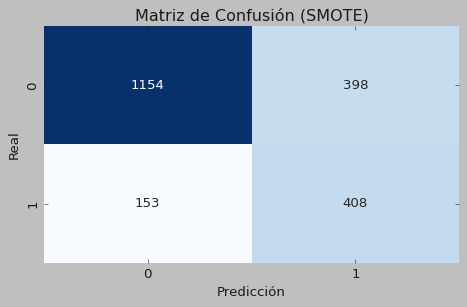

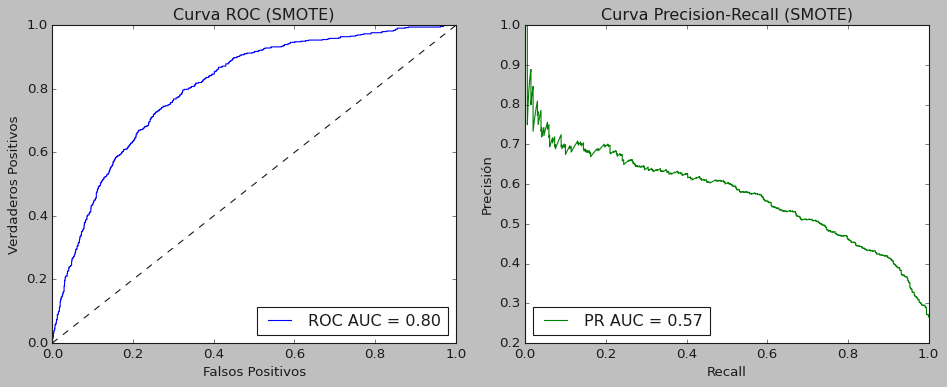


Evaluando con RandomUnderSampler
Distribución de clases tras RandomUnderSampler: Counter({0: 1635, 1: 1308})


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Resultados del Modelo con RandomUnderSampler

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.542459 |
+----------------------+----------+
| Recall               | 0.762923 |
+----------------------+----------+
| F1-Score             | 0.634074 |
+----------------------+----------+
| Especificidad        | 0.767397 |
+----------------------+----------+
| ROC-AUC              | 0.843513 |
+----------------------+----------+
| Precision-Recall AUC | 0.638357 |
+----------------------+----------+


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


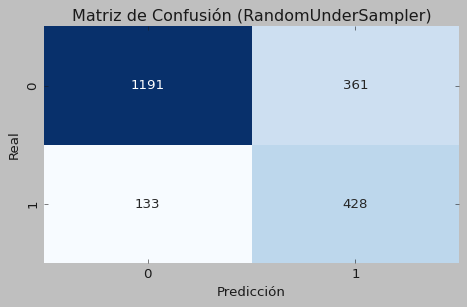

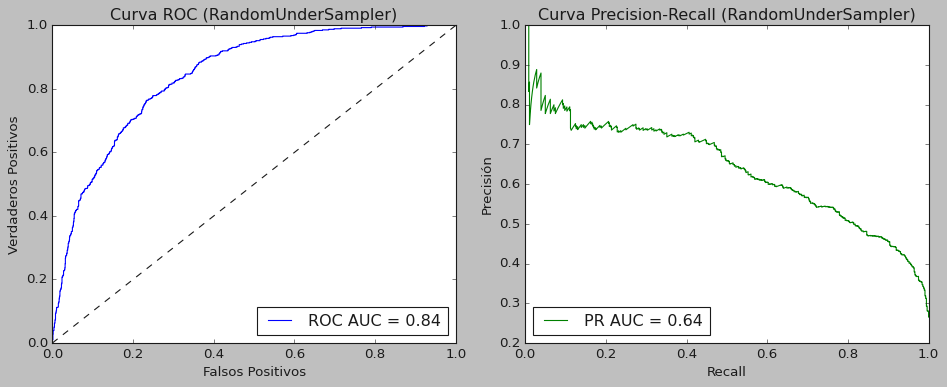


Evaluando con ADASYN
Distribución de clases tras ADASYN: Counter({0: 3622, 1: 2579})


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Resultados del Modelo con ADASYN

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.474849 |
+----------------------+----------+
| Recall               | 0.841355 |
+----------------------+----------+
| F1-Score             | 0.607074 |
+----------------------+----------+
| Especificidad        | 0.66366  |
+----------------------+----------+
| ROC-AUC              | 0.810583 |
+----------------------+----------+
| Precision-Recall AUC | 0.568087 |
+----------------------+----------+


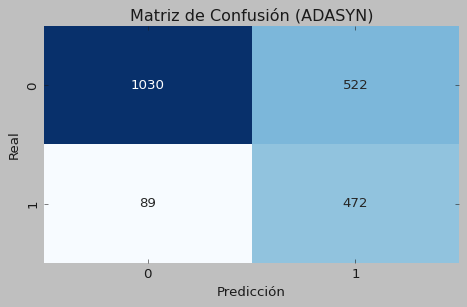

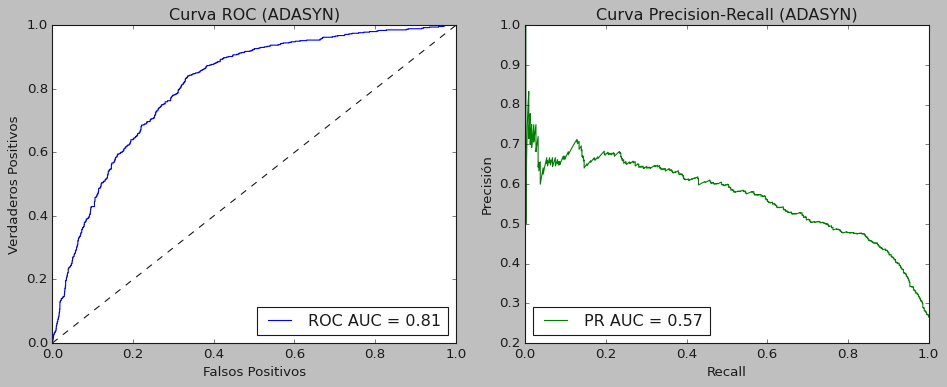


Evaluando con SMOTEENN
Distribución de clases tras SMOTEENN: Counter({0: 1977, 1: 1839})


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Resultados del Modelo con SMOTEENN

+----------------------+----------+
| Métrica              |    Valor |
+======================+==========+
| Precisión            | 0.493936 |
+----------------------+----------+
| Recall               | 0.798574 |
+----------------------+----------+
| F1-Score             | 0.610354 |
+----------------------+----------+
| Especificidad        | 0.704253 |
+----------------------+----------+
| ROC-AUC              | 0.821703 |
+----------------------+----------+
| Precision-Recall AUC | 0.594789 |
+----------------------+----------+


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


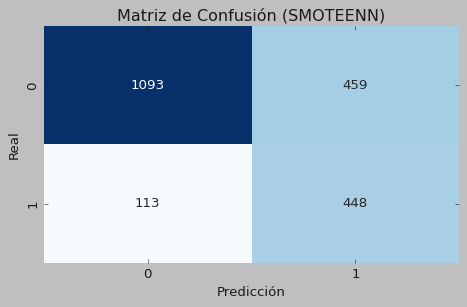

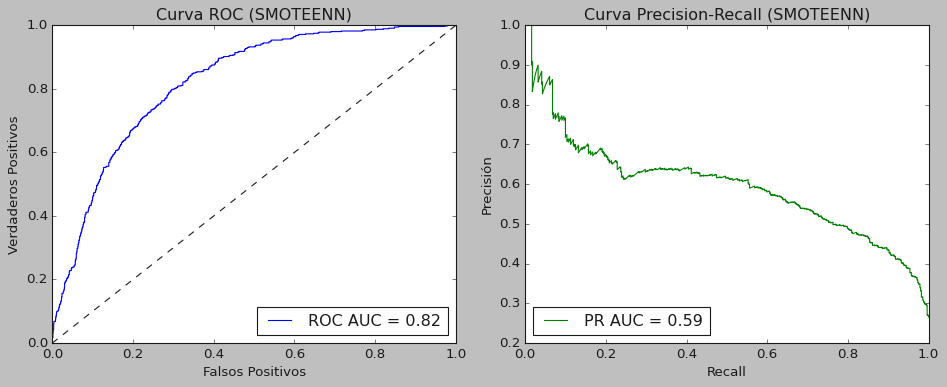

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, recall_score, f1_score, precision_score,
    precision_recall_curve, roc_auc_score, roc_curve, auc
)
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
plt.style.use('classic')
sns.set_palette('Set2')

#----------------------------------------------
# Definir las estrategias de balanceo
#----------------------------------------------
balance_strategies = {
    'SMOTE': SMOTE(sampling_strategy=0.8, random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy=0.8, random_state=42),
    'ADASYN': ADASYN(sampling_strategy=0.8, random_state=42),
    'SMOTEENN': SMOTEENN(sampling_strategy=0.8, random_state=42)
}

#----------------------------------------------
# Espacio de hiperparámetros para MLPClassifier
#----------------------------------------------
param_dist_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100],
    'random_state': [42]}

#----------------------------------------------
# Configuración del RandomizedSearchCV
#----------------------------------------------

# Configuración del modelo MLPClassifier
mlp_model = MLPClassifier(random_state=42)

# Configurar RandomizedSearchCV con validación cruzada estratificada
random_search_mlp = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_dist_mlp,
    n_iter=20,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1,
    random_state=42 )

#----------------------------------------------
# Bucle para evaluar cada técnica de balanceo
#----------------------------------------------
for method_name, balancer in balance_strategies.items():
    print(f"\n{'='*40}\nEvaluando con {method_name}\n{'='*40}")

    # Aplicar el balanceo de clases
    X_train_balanced, y_train_balanced = balancer.fit_resample(X_train_preprocessed, y_train)
    print(f"Distribución de clases tras {method_name}: {Counter(y_train_balanced)}")

    # Ajustar el modelo a los datos balanceados
    random_search_mlp.fit(X_train_balanced, y_train_balanced)

    # Obtener el mejor modelo ajustado
    best_mlp_model = random_search_mlp.best_estimator_

    # Predecir las probabilidades en el conjunto de prueba
    y_pred_proba_mlp = best_mlp_model.predict_proba(X_test_preprocessed)[:, 1]

    # Ajustar el umbral para maximizar el F1-Score
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_mlp)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_threshold = thresholds[np.argmax(f1_scores)]

    # Predecir usando el umbral óptimo
    y_pred_mlp = (y_pred_proba_mlp >= optimal_threshold).astype(int)

    # Evaluar el modelo
    precision_value = precision_score(y_test, y_pred_mlp)
    recall_value = recall_score(y_test, y_pred_mlp)
    f1_value = f1_score(y_test, y_pred_mlp)
    roc_auc_value = roc_auc_score(y_test, y_pred_proba_mlp)

    # Calcular la especificidad
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()
    specificity_value = tn / (tn + fp)

    # Calcular Precision-Recall AUC
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_pred_proba_mlp)
    pr_auc_value = auc(recall_pr, precision_pr)

    # Crear un DataFrame para mostrar las métricas de forma ordenada
    metrics_df = pd.DataFrame({
        'Métrica': ['Precisión', 'Recall', 'F1-Score', 'Especificidad', 'ROC-AUC', 'Precision-Recall AUC'],
        'Valor': [precision_value, recall_value, f1_value, specificity_value, roc_auc_value, pr_auc_value]
    })

    # Mostrar la tabla de métricas
    print(f"\nResultados del Modelo con {method_name}\n")
    print(metrics_df.to_markdown(index=False, tablefmt="grid"))

    # Matriz de confusión
    confusion = confusion_matrix(y_test, y_pred_mlp)

    # matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión ({method_name})')
    plt.tight_layout()
    plt.show()

    # Crear subplots para las curvas
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_mlp)
    axes[0].plot(fpr, tpr, label=f'ROC AUC = {roc_auc_value:.2f}', color='blue')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_xlabel('Falsos Positivos')
    axes[0].set_ylabel('Verdaderos Positivos')
    axes[0].set_title(f'Curva ROC ({method_name})')
    axes[0].legend(loc='lower right')

    # Curva Precision-Recall
    axes[1].plot(recall_pr, precision_pr, label=f'PR AUC = {pr_auc_value:.2f}', color='green')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precisión')
    axes[1].set_title(f'Curva Precision-Recall ({method_name})')
    axes[1].legend(loc='lower left')

    plt.tight_layout()
    plt.show()

## Distribución de Probabilidades de Churn.
La gráfica muestra la distribución de las probabilidades de que los clientes abandonen un servicio (churn). El pico a la izquierda indica que muchos clientes tienen baja probabilidad de irse, mientras que el pico a la derecha muestra un grupo con alta probabilidad de churn. La línea roja vertical señala el umbral óptimo (0.43), usado para clasificar a los clientes como propensos o no a irse.

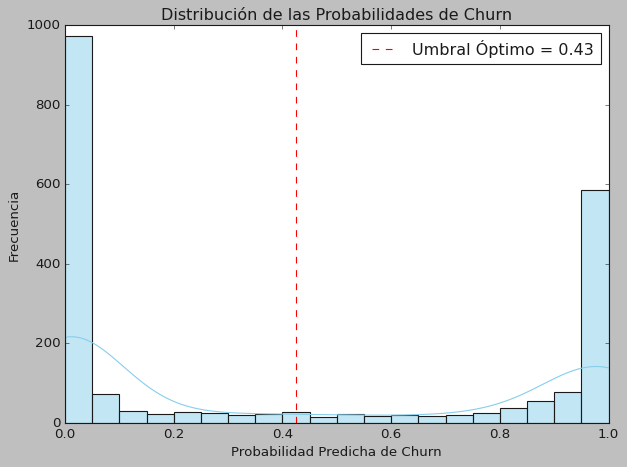

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba_mlp, bins=20, kde=True, color='skyblue')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Umbral Óptimo = {optimal_threshold:.2f}')
plt.xlabel('Probabilidad Predicha de Churn')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Probabilidades de Churn')
plt.legend()
plt.tight_layout()
plt.show()


## Clientes en riesgo.
Se extraen los clientes mayor probabilidad a abandonar del conjunto de prueba, dando como resultado la probabilidad individual que dispone cada uno.

In [ ]:
# Crear un DataFrame con las características originales y las probabilidades de churn
clientes_en_riesgo = pd.DataFrame(X_test_preprocessed, columns=feature_names)
clientes_en_riesgo['ProbabilidadChurn'] = y_pred_proba_mlp

# Filtrar clientes con alta probabilidad de churn (>80%)
clientes_en_riesgo = clientes_en_riesgo[clientes_en_riesgo['ProbabilidadChurn'] >= 0.8]

# Mostrar los primeros registros
print(f"Clientes con alta probabilidad de churn (>80%): {len(clientes_en_riesgo)}")
clientes_en_riesgo.head()


Clientes con alta probabilidad de churn (>80%): 754


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ProbabilidadChurn
0,-0.587213,1.028416,-0.245786,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.995475
2,-0.506057,1.111086,-0.201219,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.999922
11,-1.195884,0.153764,-0.915073,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.999697
14,-1.195884,0.145497,-0.922079,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.840586
15,-0.384323,0.330679,-0.258990,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.999628


## Evaluación de resultados de Perceptrón Multicapa.

Es importante mencionar que luego de 100 iteraciones el modelo convergió, lo cual sugiere que se podrían obtener mejores resultados aumentando el número de iteraciones o ajustando otros parámetros del modelo.

SMOTE con MLP

* SMOTE logra un recall moderado (0.727) y una precisión baja (0.506), lo que indica que identifica una buena proporción de clientes que abandonan, pero con una alta tasa de falsos positivos. El F1-Score (0.597) y el Precision-Recall AUC (0.574) son moderados, lo que sugiere un equilibrio subóptimo entre precisión y recall. Aunque el ROC-AUC (0.805) es decente, SMOTE no destaca en comparación con otras técnicas. Es una opción viable si se busca un recall aceptable, pero no es la mejor para MLP en este caso.

RandomUnderSampler con MLP

* RandomUnderSampler ofrece el mejor equilibrio entre precisión (0.542) y recall (0.763), con el F1-Score más alto (0.634). Además, tiene el ROC-AUC más alto (0.844) y el Precision-Recall AUC más alto (0.638), lo que indica una buena capacidad de clasificación y buen desempeño en esta problemática en donde los datos estan altamente desbalanceados. Esta técnica es la mejor opción para MLP, ya que maximiza el equilibrio entre métricas y ofrece el mejor desempeño general.


ADASYN con MLP

* ADASYN logra el recall más alto (0.841), lo que significa que identifica la mayor cantidad de clientes que abandonan. Sin embargo, la precisión es la más baja (0.475), lo que resulta en una alta tasa de falsos positivos. El F1-Score (0.607) y el Precision-Recall AUC (0.568) son moderados, pero inferiores a RandomUnderSampler. Aunque el ROC-AUC (0.811) tambien ofrece buenos resultados, ADASYN es de utilidad solo si el objetivo principal es maximizar el recall a cambio de una precisión menor.

SMOTEENN con MLP

* SMOTEENN logra un recall alto (0.799) y una precisión moderada (0.494), lo que resulta en un F1-Score (0.610) competitivo. El ROC-AUC (0.822) es alto, lo que indica una buena capacidad de clasificación, y el Precision-Recall AUC (0.595) es decente. Aunque es una opción sólida, especialmente si se busca un recall alto sin sacrificar demasiado la precisión, no supera a RandomUnderSampler en términos de equilibrio general.

---


# Fase 3 : Evaluación final y conclusiones.

El modelo Random Forest (RF) presenta un rendimiento superior al Perceptrón Multicapa (MLP) en el problema de churn, logrando un mejor equilibrio entre las métricas de precisión y recall. Con técnicas de muestreo como SMOTEENN y RandomUnderSampler, RF alcanza un F1-Score alto (0.633-0.634) y un ROC-AUC robusto (0.826-0.836). Esto sugiere que RF es más eficaz para identificar a los clientes propensos a abandonar sin generar excesivos falsos positivos. Su consistencia con diferentes técnicas de muestreo refuerza su fiabilidad. En particular, SMOTEENN se destaca al maximizar el recall (0.777) mientras mantiene una precisión aceptable (0.534). Adicionalmente
No obstante, se podría mejorar el rendimiento de RF con un ajuste más exhaustivo de hiperparámetros, como el número de árboles, la profundidad máxima o el criterio de división, aunque esto implicaria un mayor costo computacional.

En contraste, el MLP muestra un rendimiento más variable. Aunque alcanza un recall muy alto (0.841 con ADASYN), su precisión baja (0.475) indica una mayor tasa de falsos positivos. La mejor combinación para MLP se obtiene con RandomUnderSampler, logrando un F1-Score competitivo (0.634) y el ROC-AUC más alto (0.844). Sin embargo, MLP no logra el equilibrio general de métricas que ofrece RF. Al igual que RF, el MLP podría beneficiarse de un ajuste en sus hiperparámetros, como el número de capas ocultas, la tasa de aprendizaje o las iteraciones, aunque también implicaría un mayor consumo de recursos computacionales.

En conclusión, la elección entre RF y MLP depende en gran medida de los objetivos y recursos de la empresa. Si el enfoque está en maximizar la detección de clientes que abandonan manteniendo un buen equilibrio en las métricas, RF con SMOTEENN es la opción más adecuada. Por otro lado, si la prioridad es un recall absoluto y la empresa puede tolerar un mayor número de falsos positivos, el MLP podría ser una alternativa viable. Ambos modelos tienen potencial para mejorar con una optimización más detallada de hiperparámetros, siempre considerando el balance con los recursos computacionales disponibles y las estrategias comerciales de la empresa.

---


# Fuentes:

* G. James, D. Witten, T. Hastie y R. Tibshirani, “Tree-Based Methods,” en An Introduction to Statistical Learning: with Applications in R. New York, NY: Springer New York, 2013, págs. 303-335,isbn: 978-1-4614-7138-7. doi: 10.1007/978-1-4614-7138-7_8. dirección: https://doi.org/10.1007/978-1-4614-7138-7_8.

* M. Kubat, “Artificial Neural Networks,” en An Introduction to Machine Learning. Cham: Springer International Publishing, 2015, págs. 91-111, isbn: 978-3-319-20010-1. doi: 10.1007/978-3-319-20010-1_5. dirección: https://doi.org/10.1007/978-3-319-20010-1_5.